In [15]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np

def plot_tonal_tension_with_bars(file_path, bpm = None, bars_per_segment=16):
    # Load the audio file
    y, sr = librosa.load(file_path, sr=None)  # Load with the original sample rate

    # if no bpm given, estimate
    if bpm == None:
      tempo, _ = librosa.beat.beat_track(y=y, sr=sr)
      print(f'Estimated BPM: {tempo}')

    # extract Chroma Features
    chroma = librosa.feature.chroma_cqt(y=y, sr=sr)

    # define a simple consonant triad (C major: C, E, G)
    C_major = np.zeros(12)
    C_major[[0, 4, 7]] = 1  # C, E, G are set to 1

    # tension defined as the Euclidean distance from the C major triad
    tension = np.sqrt(np.sum((chroma - C_major[:, np.newaxis])**2, axis=0))

    # normalize tension
    tension = (tension - np.min(tension)) / (np.max(tension) - np.min(tension))

    # calculations for bars on x axis
    samples_per_beat = sr * 60 / tempo
    beats_per_bar = 4
    samples_per_bar = samples_per_beat * beats_per_bar
    samples_per_segment = samples_per_bar * bars_per_segment
    total_segments = int(np.floor(len(y) / samples_per_segment))
    labels = [f"{i * bars_per_segment} bars" for i in range(total_segments + 1)]
    ticks = [i * samples_per_segment / sr for i in range(total_segments + 1)]

    # Time vector for x-axis
    time = np.linspace(0, len(y) / sr, num=tension.size)

    # plotting
    plt.figure(figsize=(10, 4))
    plt.plot(time, tension, label='Tonal Tension')
    plt.xticks(ticks, labels, rotation = 45)
    plt.title(f'{file_path} Tonal Tension Curve')
    plt.xlabel('Bars')
    plt.ylabel('Normalized Tonal Tension')
    plt.grid(True)
    plt.legend()
    plt.show()

In [20]:
import os

tracks = [track for track in os.listdir('.') if track.endswith('.mp3')]

Estimated BPM: 135.99917763157896


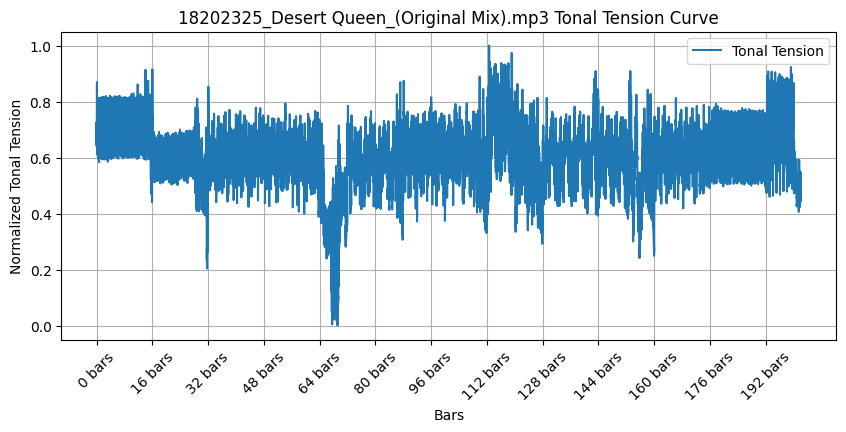

Estimated BPM: 129.19921875


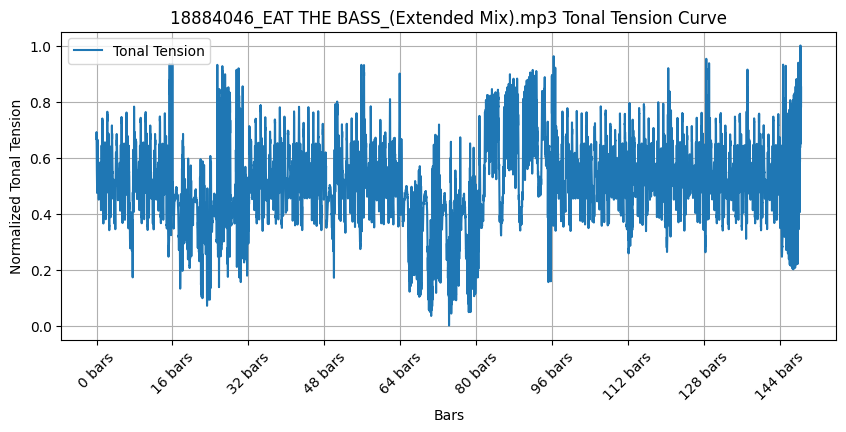

Estimated BPM: 129.19921875


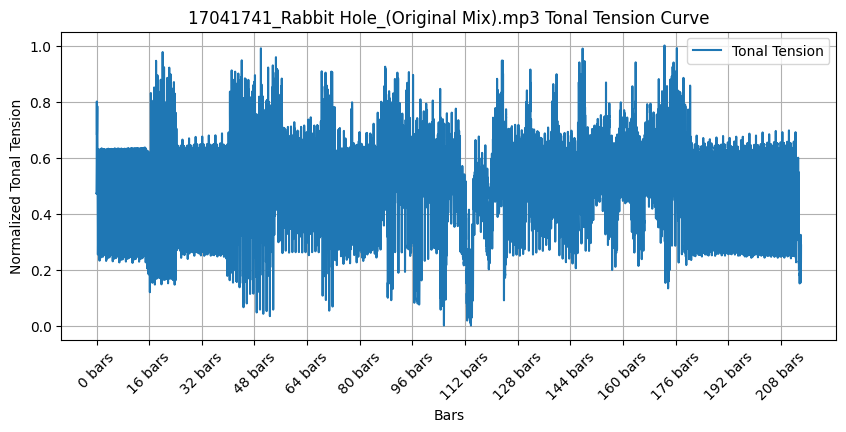

Estimated BPM: 129.19921875


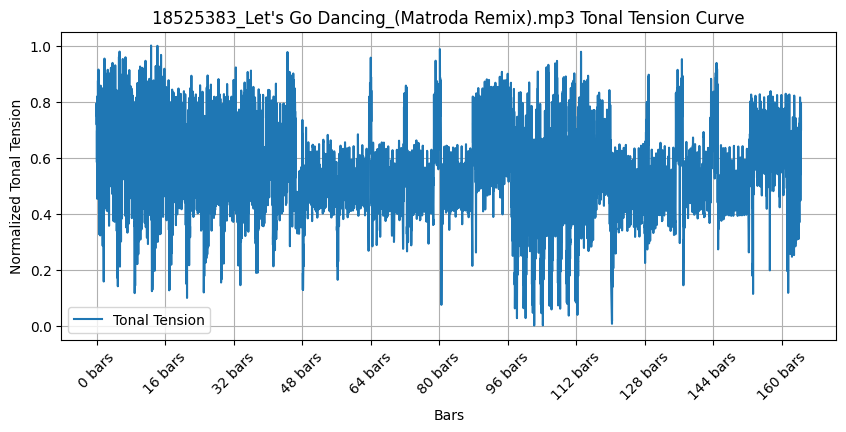

Estimated BPM: 129.19921875


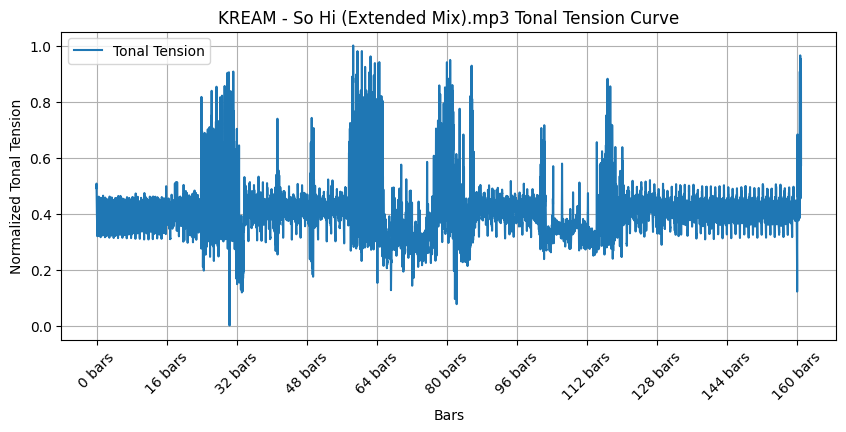

Estimated BPM: 135.99917763157896


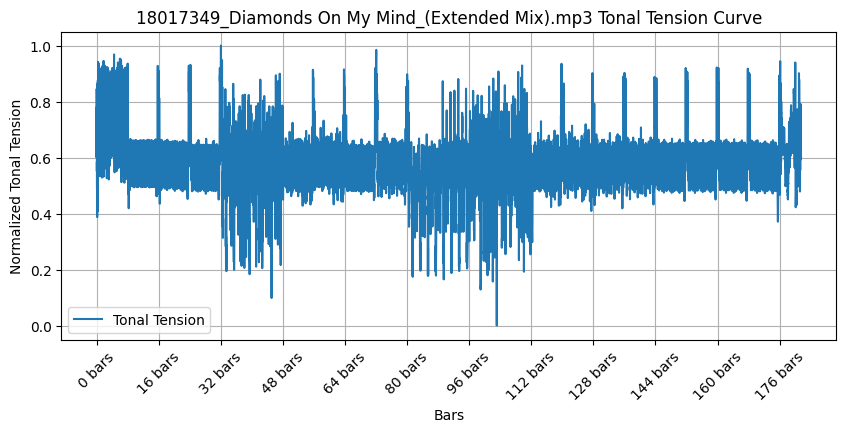

Estimated BPM: 132.51201923076923


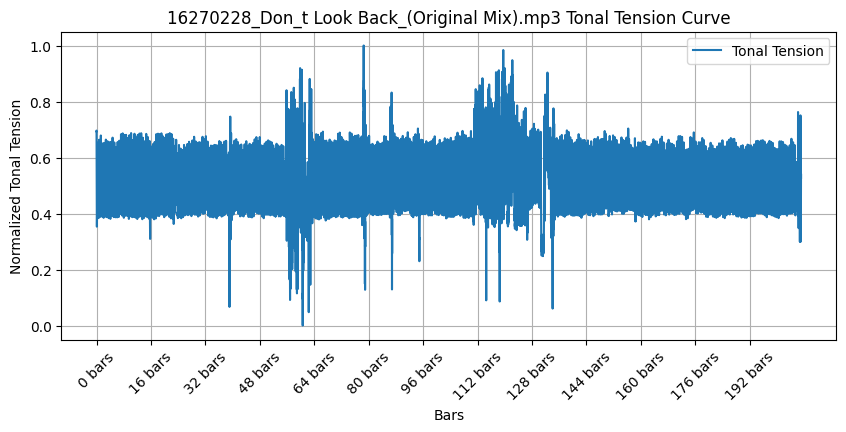

Estimated BPM: 135.99917763157896


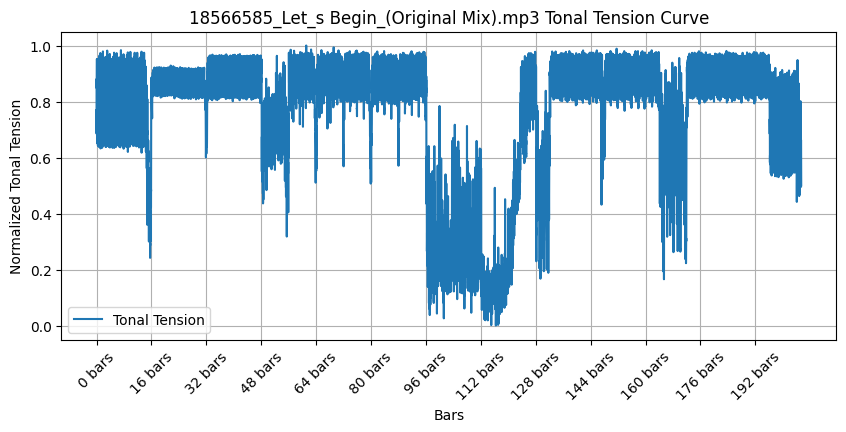

Estimated BPM: 135.99917763157896


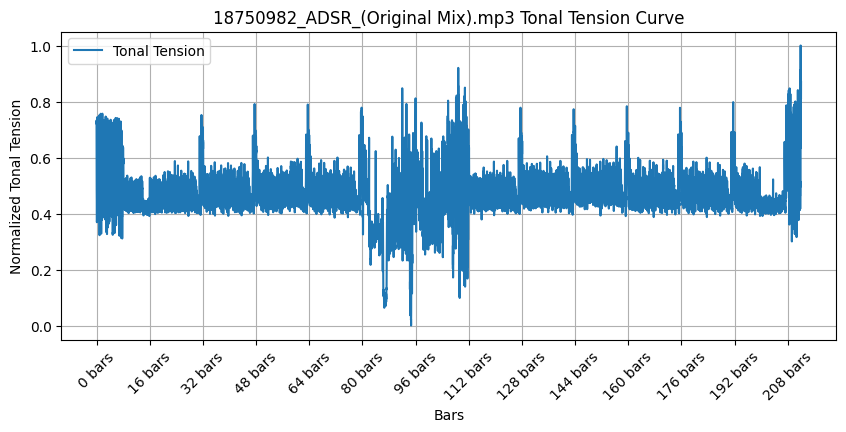

Estimated BPM: 132.51201923076923


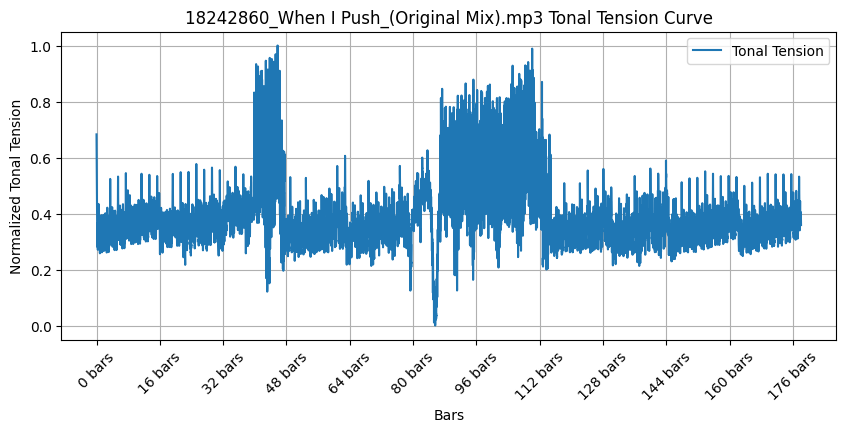

In [21]:
for track in tracks:
  plot_tonal_tension_with_bars(track)